### Background parameters and citations

In [1]:
# take the general effect of amyloid lowering -> improved cognition rom the meta0analysis 
# Ackley SF, Zimmerman SC, Brenowitz WD, Tchetgen EJT, Gold AL, Manly JJ, Mayeda ER, Filshtein TJ, Power MC, Elahi FM, Brickman AM, Glymour MM. Effect of reductions in amyloid levels on cognitive change in randomized trials: instrumental variable meta-analysis. Bmj. 2021;372:n156.

## redtag - make sure to get the updated version of this that added teh extra data, there is an errata to the initial paper

# for all da

# this will give us change in amyloid lowering -> MMSE

allDataSUVRToMMSEMean = 0.034
allDataSUVRToMMSESE = 0.046

amyloidSUVRTToMMSEMean = 0.044
amyloidSUVRTToMMSESE = 0.049

# it looks like they have an version of this that uses CDR-SB in their appendix
# it also looks like they have an updated version of the analysis on their shiny app: https://amyloidintegratingevidence.shinyapps.io/Shiny/ 

# generate a prior — multiply the eneral effect by the distribution fo that association to get the expected effect of lecanemab
# redtag: need to clarify what SUVR means...going to assume that # going to assume that their degree of amyloid in % change in centiloids transfers to SUVR

# not sure if this should be on a relative scale or an absolute one
changeIn18MonthSUVRMean = 55.5
changeIn18MonthSUVRSE = 1.80

averageBaselineCentiloids = 76.5

# this represents data from the lecanemab trial on the SURV reduction, in 0.1 unit SUR
relativeChangeIn18MonthSUVRMean = changeIn18MonthSUVRMean/averageBaselineCentiloids*10
relativeChangeIn18MonthSUVRSE = changeIn18MonthSUVRSE/averageBaselineCentiloids*10

mmseToCDRSBIntercept = 30
mmseToCDRSBSlope = (20.75-30)/6.25

cdrToMMSEIntercept = -1*  mmseToCDRSBIntercept
cdrToMMSEslope = 1/mmseToCDRSBSlope
print(f"mmse to CRDR slope : {mmseToCDRSBSlope}")

# update the prior using the observed effect from the lecanemab trial...to get a posterior

meanCDRSBChangeWithLecanemabInTrial=-0.45
sdCDRSBChangeWithLecanemabInTrial=0.11

mmse to CRDR slope : -1.48


### Estimate Prior and transformations

In [5]:
sampleSize = 1000000
import numpy as np
import numpy.random as rand

mmseOverSUVR = rand.normal(loc=allDataSUVRToMMSEMean, scale =allDataSUVRToMMSESE, size=sampleSize)

# this represents data from the lecanemab trial on the SUVR reduction, in 0.1 unit SUR 
# it is a random variale accounting for the error in the magnitude of SUVR reduction in the trial
lecanemabSUVRChange = rand.normal(loc=relativeChangeIn18MonthSUVRMean, scale =relativeChangeIn18MonthSUVRSE, size=sampleSize)

lecanemabMMSEEffect = mmseOverSUVR * lecanemabSUVRChange
lecanemabCDREffect = lecanemabMMSEEffect/mmseToCDRSBSlope


In [6]:
### LIkelihood and posterior

In [12]:
# this is the change in CDR from the trial
cdrChangeWithTreatment = rand.normal(meanCDRSBChangeWithLecanemabInTrial, sdCDRSBChangeWithLecanemabInTrial, size=sampleSize)
posterior = -1*lecanemabCDREffect*cdrChangeWithTreatment


In [11]:
dir(lecanemabCDREffect)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__

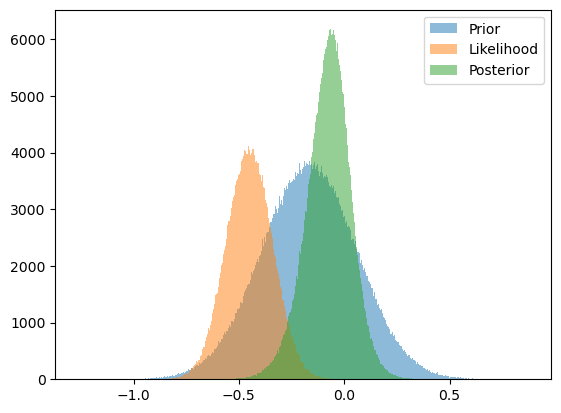

In [13]:
import matplotlib.pyplot as plt
plt.hist(lecanemabCDREffect, bins=1000, label="Prior", alpha=0.5)
plt.hist(cdrChangeWithTreatment, bins=1000, label="Likelihood", alpha=0.5)
plt.hist(posterior, bins=1000, label='Posterior', alpha=0.5)
plt.legend()


(array([2.4000e+01, 3.1400e+02, 2.6830e+03, 1.1524e+04, 2.6358e+04,
        3.1751e+04, 1.9652e+04, 6.5090e+03, 1.0910e+03, 9.4000e+01]),
 array([-1.15344887, -0.96642732, -0.77940577, -0.59238421, -0.40536266,
        -0.21834111, -0.03131956,  0.155702  ,  0.34272355,  0.5297451 ,
         0.71676665]),
 <BarContainer object of 10 artists>)

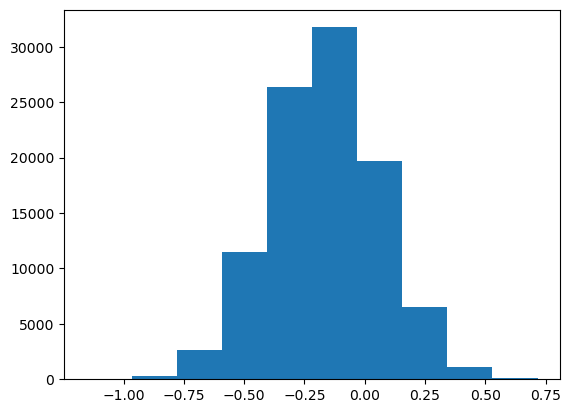

In [6]:
import matplotlib.pyplot as plt
plt.hist(lecanemabCDREffect)

In [9]:
lecanemabCDREffect.mean()

-0.16662718280718844